In function below, I simulate a game between two players, A and B. The players take turns rolling dice, and their balances and the pot balance are updated based on the outcomes. The game continues until both players roll a 1 simultaneously or until one player's balance becomes negative. The function returns the rolls of each player, the initial rolls, the final balances, the pot balance, the winner, loser, and the total number of rounds played.

In [21]:
import random

def play_game():
    A, B, pot = 4, 4, 2
    a_rolls, b_rolls = [], []
    winner, loser, total_rounds = None, None, None

    while True:
        a_roll = random.randint(1, 6)
        b_roll = random.randint(1, 6)

        a_rolls.append(a_roll)
        b_rolls.append(b_roll)

        if a_roll == 1 and b_roll == 1:
            break

        if a_roll == 1:
            A -= 1
            pot += 1
        elif a_roll == 2:
            A += pot
            pot = 0
        elif a_roll == 3:
            A += pot // 2
            pot -= pot // 2

        if b_roll == 1:
            B -= 1
            pot += 1
        elif b_roll == 2:
            B += pot
            pot = 0
        elif b_roll == 3:
            B += pot // 2
            pot -= pot // 2


        total_rounds = len(b_rolls)

        if A < 0:
            winner,loser = "Player B","Player A"
            break
        elif B < 0:
            winner,loser = "Player A","Player B"
            break

    return a_rolls, b_rolls, a_rolls[0], b_rolls[0], A, B, pot, winner, loser, total_rounds


In function below, I simulate a game between Player A and Player B. It tracks the number of game cycles completed until one player's balance becomes negative. The function returns the total number of game cycles completed and determines the winner and loser of the game based on their balances.

In [22]:
import random

def simulate_game():
    player_A_balance = 4
    player_B_balance = 4
    pot_balance = 2
    game_cycles = 0

    while player_A_balance >= 0 and player_B_balance >= 0:
        player_A_roll = random.randint(1, 6)
        player_B_roll = random.randint(1, 6)

        player_A_balance, pot_balance = process_roll(player_A_balance, player_A_roll, pot_balance)
        player_B_balance, pot_balance = process_roll(player_B_balance, player_B_roll, pot_balance)

        game_cycles += 1

    game_winner, game_loser = determine_winner(player_A_balance, player_B_balance)

    return game_cycles, game_winner, game_loser

def process_roll(player_balance, roll_value, pot_balance):
    if roll_value == 1:
        return player_balance, pot_balance
    elif roll_value == 2:
        return player_balance + pot_balance, 0
    elif roll_value == 3:
        return player_balance + pot_balance // 2, pot_balance - pot_balance // 2
    else:
        return player_balance - 1, pot_balance + 1

def determine_winner(balance_A, balance_B):
    if balance_A < 0:
        return "Player B", "Player A"
    elif balance_B < 0:
        return "Player A", "Player B"

    return None, None


Function below gets the number of cycles played in a game by running simulation.

In [23]:
def expected_cycles(n):
    total = 0  # Initialize a variable to track the average number of cycles played over repeated trials of the game
    for i in range(n):
        total += simulate_game()[0]  # Repeat the game_cycles() function n times and track the total number of cycles
    return total / n  # Return the average number of cycles completed over n repeated simulations of the game

In [24]:
import pandas as pd

# Create an empty DataFrame
columns = ["Player A Rolls", "Player B Rolls", "Player A's Initial Roll", "Player B's Initial Roll", "Final Score for A", "Final Score for B", "Final Pot Amount", "Game Winner", "Game Loser", "Total Game Cycles"]
df = pd.DataFrame(columns=columns)

# Perform the game for 10,000 iterations
for i in range(1, 10001):
    df.loc[i] = play_game()

df.head()

,Player A Rolls,Player B Rolls,Player A's Initial Roll,Player B's Initial Roll,Final Score for A,Final Score for B,Final Pot Amount,Game Winner,Game Loser,Total Game Cycles
1,"[2, 5, 5, 6, 1, 3, 4, 6, 3, 3, 4, 2, 4, 5, 4, ...","[6, 2, 3, 6, 4, 6, 2, 1, 3, 5, 3, 1, 5, 6, 3, ...",2,6,5,2,3,None,None,146
2,"[1, 3, 3, 5, 4, 5, 6, 2, 5, 2, 6, 1, 5, 1]","[6, 3, 4, 3, 5, 4, 5, 1, 1, 4, 3, 6, 6, 1]",1,6,6,3,1,None,None,13
3,"[3, 3, 6, 6, 2, 3, 6, 5, 5, 6, 2, 5, 2, 1, 3, 1]","[6, 2, 1, 5, 2, 3, 1, 3, 1, 6, 3, 2, 1, 6, 5, 1]",3,6,8,1,1,None,None,15
4,"[1, 3, 1, 6, 2, 2, 2, 2, 4, 5, 1]","[4, 4, 5, 5, 2, 2, 4, 2, 2, 3, 1]",1,4,6,4,0,None,None,10
5,"[2, 4, 2, 5, 6, 6, 1, 6, 5, 6, 6, 2, 2, 1, 1]","[2, 6, 6, 1, 1, 6, 5, 4, 6, 4, 4, 6, 1, 2, 1]",2,2,7,3,0,None,None,14


Code iterates through a range of numbers powered by 3^i calculates the expected value by calling the expected_cycles function. In the end, the code provides an average for the collection of expected values that indicate the average number of cycles expected to be played for different trial sizes, allowing for analysis and comparison.

In [25]:
e_v = []  # Create an empty list to store the expected values
iterations = 10
start = 1
end = 1500000
step = (end - start) // (iterations - 1)

for i in range(start, end + 1, step):
    expected_value = expected_cycles(i)  # Calculate the expected value using the expected_cycles function
    e_v.append(expected_value)  # Append the expected value to the list
e_v[iterations-1]

17.549643832146106

In [26]:
import statistics
statistics.mean(df['Total Game Cycles'].dropna())

29.935447338618346

In [34]:
df['Total Game Cycles'] = df['Total Game Cycles'].dropna()
print(df['Total Game Cycles'].min())  # Print the minimum value of 'Total Cycles' column in the DataFrame
print(df['Total Game Cycles'].max())  # Print the maximum value of 'Total Cycles' column in the DataFrame
print(statistics.mean(df['Total Game Cycles'].dropna()))  # Print the mean (average) value of 'Total Cycles' column in the DataFrame
print(len(df['Total Game Cycles']))  # Print the length (number of elements) of 'Total Cycles' column in the DataFrame


1
252
29.935447338618346
10000


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


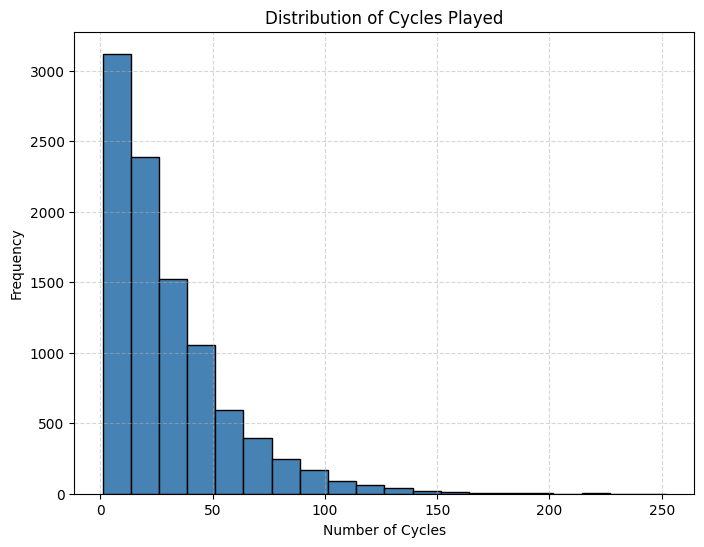

In [35]:
import matplotlib.pyplot as plt

# Display a histogram of the number of cycles played for each game
plt.figure(figsize=(8, 6))  # Adjust the figure size

# Plot the histogram with customizations
plt.hist(df['Total Game Cycles'], bins=20, color='steelblue', edgecolor='black')  # Set the color and edgecolor of bars
plt.xlabel('Number of Cycles')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.title('Distribution of Cycles Played')  # Set the title
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines with linestyle and transparency

# Show the plot
plt.show()


In [36]:
winner_counts = df['Game Winner'].value_counts()
winner_table = pd.DataFrame(winner_counts)
winner_table.columns = ['Win Count']
winner_table


,Win Count
Player B,831
Player A,751


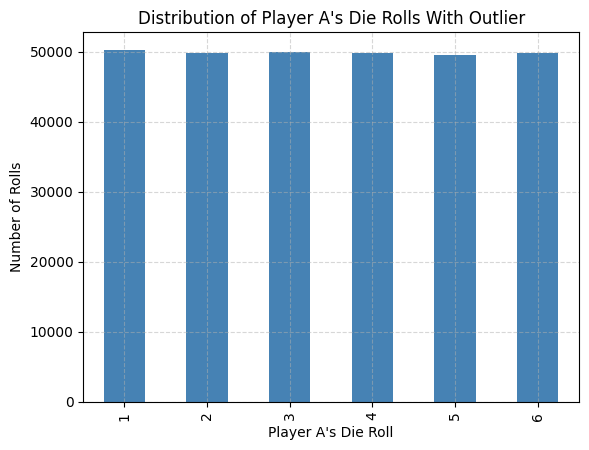

In [37]:
a_dist = df['Player A Rolls'].explode().value_counts().sort_index()
a_dist.plot(kind='bar', color='steelblue')

plt.xlabel("Player A's Die Roll")
plt.ylabel("Number of Rolls")
plt.title("Distribution of Player A's Die Rolls With Outlier")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()



In [38]:
a_series = df['Player A Rolls'].explode().reset_index(drop=True)
a_series.value_counts()/a_series.describe()['count']

1    0.168009
3    0.166769
6    0.166622
4    0.166558
2    0.166521
5    0.165522
Name: Player A Rolls, dtype: float64

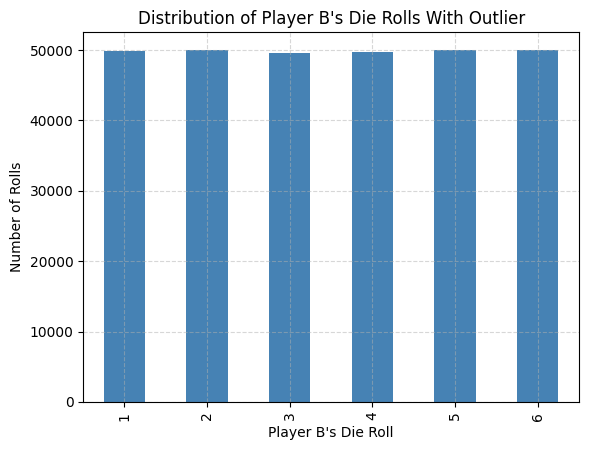

In [39]:
b_dist = df['Player B Rolls'].explode().value_counts().sort_index()
b_dist.plot(kind='bar', color='steelblue')

plt.xlabel("Player B's Die Roll")
plt.ylabel("Number of Rolls")
plt.title("Distribution of Player B's Die Rolls With Outlier")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [40]:
df['Player B Rolls'].explode().value_counts().sort_index()

1    49855
2    50044
3    49588
4    49708
5    50007
6    49979
Name: Player B Rolls, dtype: int64

In [41]:
b_series = df['Player B Rolls'].explode().reset_index(drop=True)
b_series.value_counts()/b_series.describe()['count']

2    0.167270
5    0.167146
6    0.167053
1    0.166638
4    0.166147
3    0.165746
Name: Player B Rolls, dtype: float64

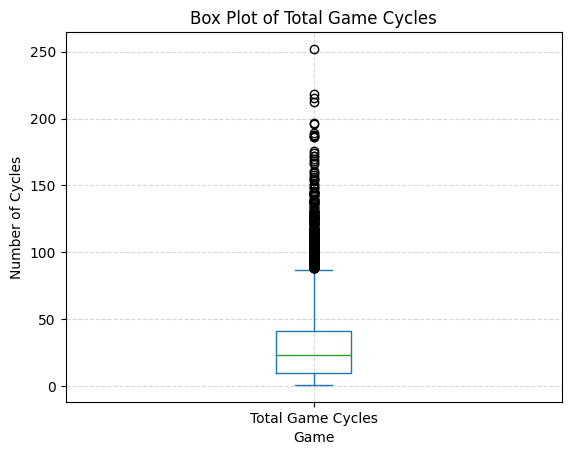

In [42]:
df['Total Game Cycles'].plot.box()

plt.xlabel("Game")
plt.ylabel("Number of Cycles")
plt.title("Box Plot of Total Game Cycles")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()



In [44]:
(df['Total Game Cycles']<100).sum()

9460

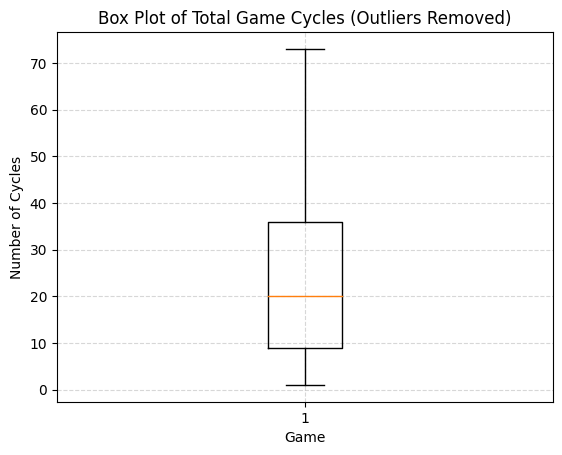

In [45]:

# Calculate the lower and upper bounds for outliers removal
Q1 = df['Total Game Cycles'].quantile(0.30)
Q3 = df['Total Game Cycles'].quantile(0.70)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers from the DataFrame
filtered_df = df[(df['Total Game Cycles'] >= lower_bound) & (df['Total Game Cycles'] <= upper_bound)]
filtered_outlier_df = df[(df['Total Game Cycles'] <= lower_bound) | (df['Total Game Cycles'] >= upper_bound)]

# Generate the box plot for the filtered DataFrame
plt.boxplot(filtered_df['Total Game Cycles'])

plt.xlabel("Game")
plt.ylabel("Number of Cycles")
plt.title("Box Plot of Total Game Cycles (Outliers Removed)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


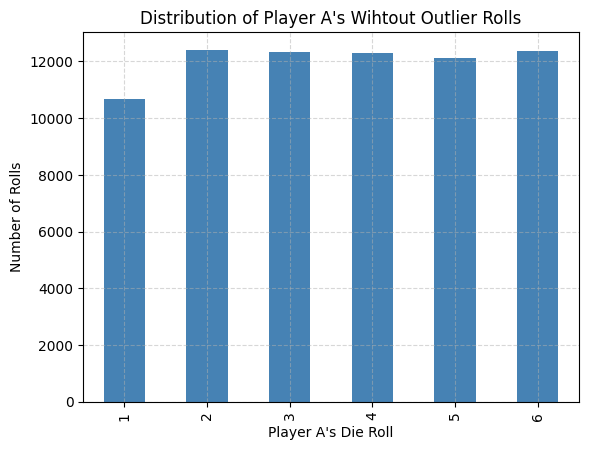

In [46]:

a_outlier = filtered_outlier_df['Player A Rolls'].explode().value_counts().sort_index()
a_outlier.plot(kind='bar', color='steelblue')

plt.xlabel("Player A's Die Roll")
plt.ylabel("Number of Rolls")
plt.title("Distribution of Player A's Wihtout Outlier Rolls")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


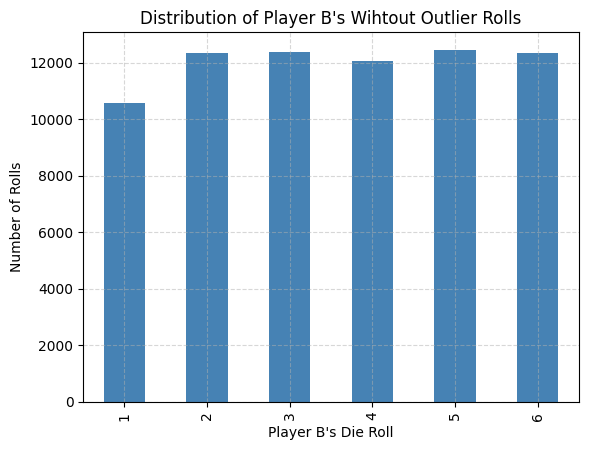

In [47]:

b_outlier = filtered_outlier_df['Player B Rolls'].explode().value_counts().sort_index()
b_outlier.plot(kind='bar', color='steelblue')

plt.xlabel("Player B's Die Roll")
plt.ylabel("Number of Rolls")
plt.title("Distribution of Player B's Wihtout Outlier Rolls")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()
